In [1]:
# importing all necessary modules 
import pandas as pd
import requests
import json
import os
import matplotlib.pyplot as plt

In [2]:
# function to check if filePath exists or not if exists then delete the file


def delete_file(fileName):
    if os.path.exists(fileName):
        os.remove(fileName)
    return


# delete if all_data.csv and bangladesh_data.csv remaining
delete_file('all_data.csv')
delete_file('bangladesh_data.csv')

In [7]:

# fetch data data and make dataframe

# latest data for all country

all_data_url = "https://lab.isaaclin.cn/nCoV/api/area?latest=1"
all_data = requests.get(all_data_url).json()  # get data in json format

all_data_df = pd.DataFrame(all_data)

all_data_df = pd.json_normalize(all_data_df['results'])

filter_all_data = all_data_df.filter(items=['continentEnglishName', 'countryEnglishName',
                                            'currentConfirmedCount', 'confirmedCount', 'curedCount', 'deadCount'])
print("Latest update of all the country`s data\n")
print(filter_all_data)

# save all data to a csv file called all_data.csv
filter_all_data.to_csv('all_data.csv')
print("Data saved to all_data.csv file")


Latest update of all the country`s data

    continentEnglishName                           countryEnglishName  \
0                   Asia                                        China   
1                   Asia                                        China   
2                   Asia                                        China   
3                   Asia                                        China   
4          North America                     United States of America   
..                   ...                                          ...   
252               Europe  United Kingdom of Great Britain and Ireland   
253               Europe                               United Kingdom   
254               Europe                             Northern Ireland   
255                 Asia                                        China   
256                 Asia                                        China   

     currentConfirmedCount  confirmedCount  curedCount  deadCount  
0             

In [4]:

# latest data for Bangladesh

# get the latest data for bangladesh
# fetch data set from this api
url = "https://lab.isaaclin.cn/nCoV/api/area?latest=1&provinceEng=Bangladesh&lang=en"
returned_data = requests.get(url).json()  # convert data to json
# to view returned data in a more presentable view
# content = json.dumps(returned_data, indent=4, sort_keys=True)
df = pd.json_normalize(returned_data['results'])  # make a dataframe
# filtered_dataframe
filtered_df = df.filter(items=['continentEnglishName', 'countryEnglishName',
                               'currentConfirmedCount', 'confirmedCount', 'curedCount', 'deadCount', ])
print("Latest update of Bangladesh`s data\n")
print(filtered_df)

# save all data to a csv file called all_data.csv
filtered_df.to_csv('bangladesh_data.csv')
print("All data saved to bangladesh_data.csv file")

Latest update of Bangladesh`s data

  continentEnglishName countryEnglishName  currentConfirmedCount  \
0                 Asia         Bangladesh               -3741807   

   confirmedCount  curedCount  deadCount  
0          496975     4231590       7192  
All data saved to bangladesh_data.csv file


10 country with highest number of current confirmed count for Covid19


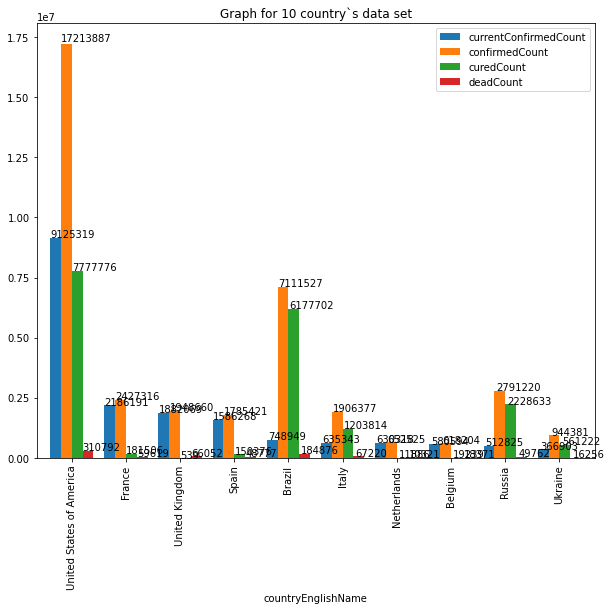

In [5]:
# data visualization part start
# for all country
data_set = pd.read_csv('all_data.csv', usecols=['countryEnglishName','currentConfirmedCount','confirmedCount','curedCount','deadCount']) 

# make a copy of data_set
data_set_copy = data_set.copy()

# get 10 country with high number of ConfirmCount for corona 
data_set_copy = data_set_copy.nlargest(10,['currentConfirmedCount'])
print ("10 country with highest number of current confirmed count for Covid19")
bar_chart = data_set_copy.plot(x='countryEnglishName', y=['currentConfirmedCount','confirmedCount','curedCount','deadCount'],width=0.8,figsize=(10,8), align="center", kind="bar")

# to show value with corresponding value
for p in bar_chart.patches:
    bar_chart.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title("Graph for 10 country`s data set")
plt.legend()    
plt.show()

Latest data of Covid19 in Bangladesh


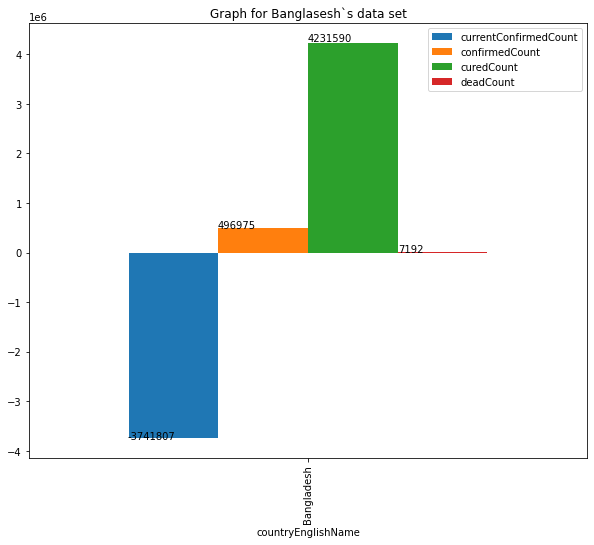

In [6]:
# for bangladesh 
bd_data = data_set = pd.read_csv('bangladesh_data.csv', usecols=['countryEnglishName','currentConfirmedCount','confirmedCount','curedCount','deadCount'])

# make a copy 
bd_data_copy = bd_data.copy()

print ("Latest data of Covid19 in Bangladesh")
bar_chart = bd_data_copy.plot(x='countryEnglishName', y=['currentConfirmedCount','confirmedCount','curedCount','deadCount'], width=.9,  align='center', figsize=(10,8), kind="bar")

# to show value with corresponding value
for p in bar_chart.patches:
    bar_chart.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.title("Graph for Banglasesh`s data set")
plt.legend()    
plt.show()